In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from numpy import linalg as la
from sklearn import metrics
import pickle

# DATA COLLECTION

In [2]:
a=pd.read_csv(r"C:\Users\user\Downloads\Contract_Awards_in_Investment_Project_Financing.csv")
a

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country,Supplier Country Code,Supplier Contract Amount (USD),Review type
0,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732528,?SERVICIOS DE CONSULTOR?A PARA LA ACTUALIZACI?...,CI-DOM-BM-62/2022,"Mar 14, 2023",739770.0,MIGUEL ANGEL REYES GOMEZ,El Salvador,SV,20000.00,Post
1,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,Nicaragua,NI,P164134,Nicaragua Dry Corridor Nutrition-Sensitive Agr...,"Agriculture, Fishing and Forestry;Industry, Tr...",Goods,Request for Quotations,1732527,Carlos Remberto Ortiz Izaguirres\nCompra de 32...,ORDEN DE COMPRA 171-811-2101-007,"Dec 23, 2022",761808.0,CARLOS REMBERTO ORTIZ IZAGUIRRES,Nicaragua,NI,20015.69,Post
2,"Aug 08, 2023",2023,EAST ASIA AND PACIFIC,Samoa,WS,P176272,Samoa Aviation and Roads Investment Project,Transportation,Consultant Services,Individual Consultant Selection,1732522,Safeguard Officer,WS-LTA-309829-CS-INDV,"Nov 16, 2022",754490.0,PERINA SILA,Samoa,WS,90931.06,Post
3,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732521,CONTRATACI?N DE CONSULTOR?A INDIVIDUAL PARA ES...,DOM-BM-CON-0012/2023,"Mar 21, 2023",735065.0,KARLA MARIA VILLANUEVA CABRERA,El Salvador,SV,2200.00,Post
4,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732520,?COORDINADOR GENERAL DE LA UNIDAD EJECUTORA DE...,DOM-BM-CON-001-2023,"Feb 09, 2023",734091.0,MILAGRO DE LOS ÁNGELES MONGE HERRERA,El Salvador,SV,48000.00,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185001,"Aug 08, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524268,Procurement Specialist - FOT,C-IC035,"Sep 07, 2016",133992.0,NATHALIE GEBRAYEL,Lebanon,LB,195200.00,Prior
185002,"Aug 08, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P149242,Emergency National Poverty Targeting Program P...,Social Protection,Consultant Services,Direct Selection,1524264,Procurement Assistant - FOT,C-IC036,"Sep 07, 2016",178397.0,JESSY EL KHOURY,Lebanon,LB,76800.00,Prior
185003,"Aug 08, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517959,Title on Consulting services as International ...,4,"Nov 02, 2016",166247.0,MOUNIR RACHED,Lebanon,LB,312000.00,Prior
185004,"Aug 08, 2023",2017,MIDDLE EAST AND NORTH AFRICA,Lebanon,LB,P133226,Lebanon Fiscal Management Reform 2,Public Administration,Consultant Services,Individual Consultant Selection,1517913,Signed Contract relative to the PMU Positions ...,2,"Nov 30, 2016",173999.0,MARWAN TAMIM (MR.),Lebanon,LB,151200.00,Prior


In [3]:
e=a.head(100)
e

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country,Supplier Country Code,Supplier Contract Amount (USD),Review type
0,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732528,?SERVICIOS DE CONSULTOR?A PARA LA ACTUALIZACI?...,CI-DOM-BM-62/2022,"Mar 14, 2023",739770.0,MIGUEL ANGEL REYES GOMEZ,El Salvador,SV,20000.00,Post
1,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,Nicaragua,NI,P164134,Nicaragua Dry Corridor Nutrition-Sensitive Agr...,"Agriculture, Fishing and Forestry;Industry, Tr...",Goods,Request for Quotations,1732527,Carlos Remberto Ortiz Izaguirres\nCompra de 32...,ORDEN DE COMPRA 171-811-2101-007,"Dec 23, 2022",761808.0,CARLOS REMBERTO ORTIZ IZAGUIRRES,Nicaragua,NI,20015.69,Post
2,"Aug 08, 2023",2023,EAST ASIA AND PACIFIC,Samoa,WS,P176272,Samoa Aviation and Roads Investment Project,Transportation,Consultant Services,Individual Consultant Selection,1732522,Safeguard Officer,WS-LTA-309829-CS-INDV,"Nov 16, 2022",754490.0,PERINA SILA,Samoa,WS,90931.06,Post
3,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732521,CONTRATACI?N DE CONSULTOR?A INDIVIDUAL PARA ES...,DOM-BM-CON-0012/2023,"Mar 21, 2023",735065.0,KARLA MARIA VILLANUEVA CABRERA,El Salvador,SV,2200.00,Post
4,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732520,?COORDINADOR GENERAL DE LA UNIDAD EJECUTORA DE...,DOM-BM-CON-001-2023,"Feb 09, 2023",734091.0,MILAGRO DE LOS ÁNGELES MONGE HERRERA,El Salvador,SV,48000.00,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Aug 08, 2023",2023,SOUTH ASIA,India,IN,P168590,Tamil Nadu Housing and Habitat Development Pro...,"Industry, Trade and Services",Consultant Services,Individual Consultant Selection,1732425,Procurement of Social Development Specialist (...,IN-TNSCB-311450-CS-INDV,"Mar 01, 2023",720864.0,K.A.N. LEGIS,India,IN,28987.28,Post
96,"Aug 08, 2023",2023,MIDDLE EAST AND NORTH AFRICA,West Bank and Gaza,GZ,P173800,West Bank and Gaza COVID-19 Emergency Response,Health,Goods,Request for Quotations,1732424,Supply of I.V. Cannula with Injection Port 22G...,MOH-WB/COVID19-AF-G2-A3,"May 21, 2023",760719.0,ADVANCED TECH COMPANY,West Bank and Gaza,GZ,34265.00,Post
97,"Aug 08, 2023",2023,MIDDLE EAST AND NORTH AFRICA,West Bank and Gaza,GZ,P173800,West Bank and Gaza COVID-19 Emergency Response,Health,Goods,Request for Quotations,1732423,Supply of Voluset for Solution 150 cc. 60 Drop...,MOH-WB/COVID19-AF-G2-A2,"May 21, 2023",760719.0,ADVANCED TECH COMPANY,West Bank and Gaza,GZ,79950.00,Post
98,"Aug 08, 2023",2023,SOUTH ASIA,India,IN,P168590,Tamil Nadu Housing and Habitat Development Pro...,"Industry, Trade and Services",Goods,Direct Selection,1732422,Procurement of 3 sets of Desktop computer with...,IN-TNSCB-352854-GO-DIR,"Mar 30, 2023",739981.0,FINECONS PRIVATE LIMITED,India,IN,2854.65,Post


# DATA CLEANING AND PRE-PROCESSING

In [4]:
print(np.size(e))

2000


In [5]:
print(np.shape(e))

(100, 20)


In [6]:
pd.isna(e)

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country,Supplier Country Code,Supplier Contract Amount (USD),Review type
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
b=e.dropna()
b

,As of Date,Fiscal Year,Region,Borrower Country,Borrower Country Code,Project ID,Project Name,Project Global Practice,Procurement Category,Procurement Method,WB Contract Number,Contract Description,Borrower Contract Reference Number,Contract Signing Date,Supplier ID,Supplier,Supplier Country,Supplier Country Code,Supplier Contract Amount (USD),Review type
0,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732528,?SERVICIOS DE CONSULTOR?A PARA LA ACTUALIZACI?...,CI-DOM-BM-62/2022,"Mar 14, 2023",739770.0,MIGUEL ANGEL REYES GOMEZ,El Salvador,SV,20000.00,Post
1,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,Nicaragua,NI,P164134,Nicaragua Dry Corridor Nutrition-Sensitive Agr...,"Agriculture, Fishing and Forestry;Industry, Tr...",Goods,Request for Quotations,1732527,Carlos Remberto Ortiz Izaguirres\nCompra de 32...,ORDEN DE COMPRA 171-811-2101-007,"Dec 23, 2022",761808.0,CARLOS REMBERTO ORTIZ IZAGUIRRES,Nicaragua,NI,20015.69,Post
2,"Aug 08, 2023",2023,EAST ASIA AND PACIFIC,Samoa,WS,P176272,Samoa Aviation and Roads Investment Project,Transportation,Consultant Services,Individual Consultant Selection,1732522,Safeguard Officer,WS-LTA-309829-CS-INDV,"Nov 16, 2022",754490.0,PERINA SILA,Samoa,WS,90931.06,Post
3,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732521,CONTRATACI?N DE CONSULTOR?A INDIVIDUAL PARA ES...,DOM-BM-CON-0012/2023,"Mar 21, 2023",735065.0,KARLA MARIA VILLANUEVA CABRERA,El Salvador,SV,2200.00,Post
4,"Aug 08, 2023",2023,LATIN AMERICA AND CARIBBEAN,El Salvador,SV,P169125,El Salvador Local Economic Resilience Project,"Transportation;Public Administration;Industry,...",Consultant Services,Individual Consultant Selection,1732520,?COORDINADOR GENERAL DE LA UNIDAD EJECUTORA DE...,DOM-BM-CON-001-2023,"Feb 09, 2023",734091.0,MILAGRO DE LOS ÁNGELES MONGE HERRERA,El Salvador,SV,48000.00,Post
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"Aug 08, 2023",2023,SOUTH ASIA,India,IN,P168590,Tamil Nadu Housing and Habitat Development Pro...,"Industry, Trade and Services",Consultant Services,Individual Consultant Selection,1732425,Procurement of Social Development Specialist (...,IN-TNSCB-311450-CS-INDV,"Mar 01, 2023",720864.0,K.A.N. LEGIS,India,IN,28987.28,Post
96,"Aug 08, 2023",2023,MIDDLE EAST AND NORTH AFRICA,West Bank and Gaza,GZ,P173800,West Bank and Gaza COVID-19 Emergency Response,Health,Goods,Request for Quotations,1732424,Supply of I.V. Cannula with Injection Port 22G...,MOH-WB/COVID19-AF-G2-A3,"May 21, 2023",760719.0,ADVANCED TECH COMPANY,West Bank and Gaza,GZ,34265.00,Post
97,"Aug 08, 2023",2023,MIDDLE EAST AND NORTH AFRICA,West Bank and Gaza,GZ,P173800,West Bank and Gaza COVID-19 Emergency Response,Health,Goods,Request for Quotations,1732423,Supply of Voluset for Solution 150 cc. 60 Drop...,MOH-WB/COVID19-AF-G2-A2,"May 21, 2023",760719.0,ADVANCED TECH COMPANY,West Bank and Gaza,GZ,79950.00,Post
98,"Aug 08, 2023",2023,SOUTH ASIA,India,IN,P168590,Tamil Nadu Housing and Habitat Development Pro...,"Industry, Trade and Services",Goods,Direct Selection,1732422,Procurement of 3 sets of Desktop computer with...,IN-TNSCB-352854-GO-DIR,"Mar 30, 2023",739981.0,FINECONS PRIVATE LIMITED,India,IN,2854.65,Post


In [8]:
b.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 94 entries, 0 to 99
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   As of Date                          94 non-null     object 
 1   Fiscal Year                         94 non-null     int64  
 2   Region                              94 non-null     object 
 3   Borrower Country                    94 non-null     object 
 4   Borrower Country Code               94 non-null     object 
 5   Project ID                          94 non-null     object 
 6   Project Name                        94 non-null     object 
 7   Project Global Practice             94 non-null     object 
 8   Procurement Category                94 non-null     object 
 9   Procurement Method                  94 non-null     object 
 10  WB Contract Number                  94 non-null     int64  
 11  Contract Description                94 non-null

In [9]:
b.describe()

,Fiscal Year,WB Contract Number,Supplier ID,Supplier Contract Amount (USD)
count,94.000000,9.400000e+01,94.000000,94.000000
mean,2022.840426,1.732472e+06,694464.744681,63929.966277
std,0.610010,3.087589e+01,102155.460328,145558.817640
min,2020.000000,1.732421e+06,342983.000000,147.350000
25%,2023.000000,1.732447e+06,629838.000000,9944.180000
50%,2023.000000,1.732470e+06,754932.500000,20348.845000
75%,2023.000000,1.732500e+06,760805.000000,47691.000000
max,2023.000000,1.732528e+06,761808.000000,817430.100000


# EDA

In [10]:
c=b[["Fiscal Year","WB Contract Number"]]
c

,Fiscal Year,WB Contract Number
0,2023,1732528
1,2023,1732527
2,2023,1732522
3,2023,1732521
4,2023,1732520
...,...,...
95,2023,1732425
96,2023,1732424
97,2023,1732423
98,2023,1732422


<AxesSubplot:>

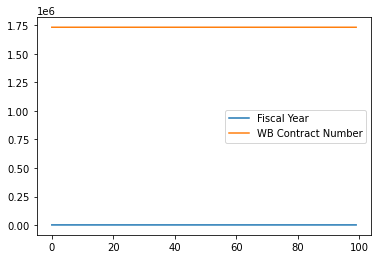

In [11]:
c.plot.line()

<AxesSubplot:>

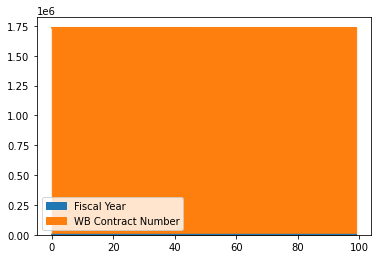

In [12]:
c.plot.area()

<AxesSubplot:ylabel='Frequency'>

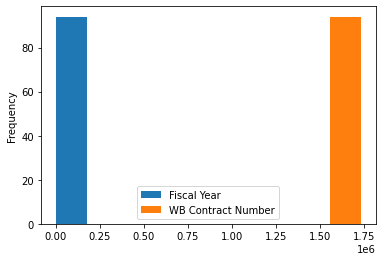

In [13]:
c.plot.hist()

<AxesSubplot:>

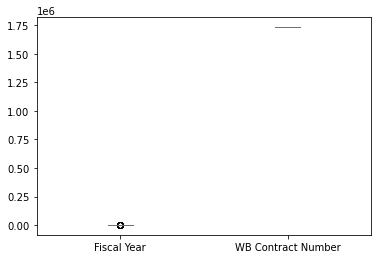

In [14]:
c.plot.box()

<AxesSubplot:ylabel='WB Contract Number'>

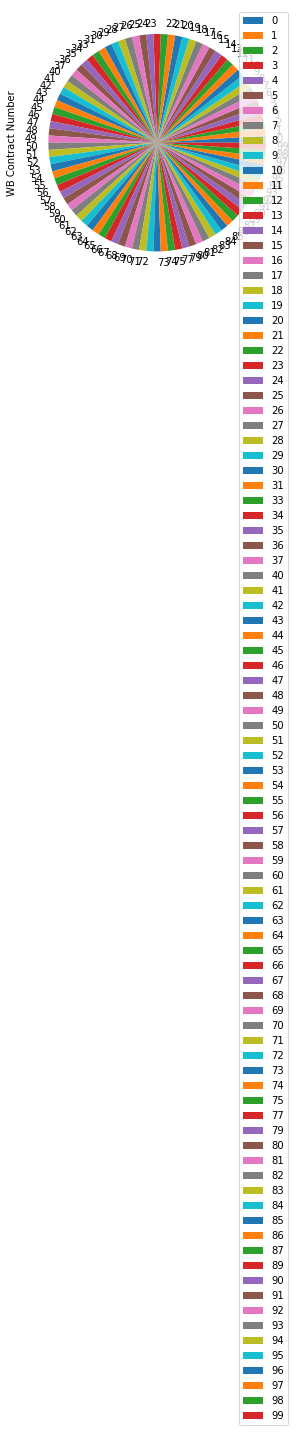

In [15]:
c.plot.pie(y='WB Contract Number',figsize=(5,5))

<AxesSubplot:xlabel='Fiscal Year', ylabel='WB Contract Number'>

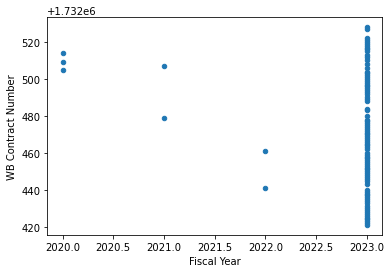

In [16]:
c.plot.scatter(x='Fiscal Year',y='WB Contract Number')

<AxesSubplot:>

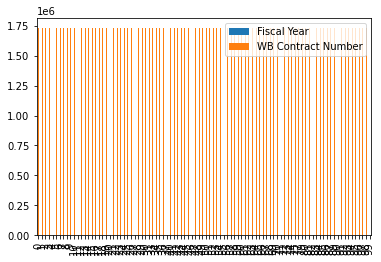

In [20]:
c.plot.bar()

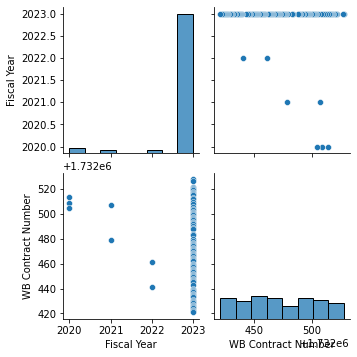

In [17]:
sns.pairplot(c)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='WB Contract Number', ylabel='Density'>

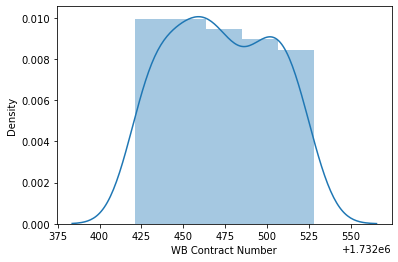

In [18]:
sns.distplot(c['WB Contract Number'])

In [33]:
d=e[["Fiscal Year","WB Contract Number","Supplier ID","Supplier Contract Amount (USD)"]]
d

,Fiscal Year,WB Contract Number,Supplier ID,Supplier Contract Amount (USD)
0,2023,1732528,739770.0,20000.00
1,2023,1732527,761808.0,20015.69
2,2023,1732522,754490.0,90931.06
3,2023,1732521,735065.0,2200.00
4,2023,1732520,734091.0,48000.00
...,...,...,...,...
95,2023,1732425,720864.0,28987.28
96,2023,1732424,760719.0,34265.00
97,2023,1732423,760719.0,79950.00
98,2023,1732422,739981.0,2854.65


<AxesSubplot:>

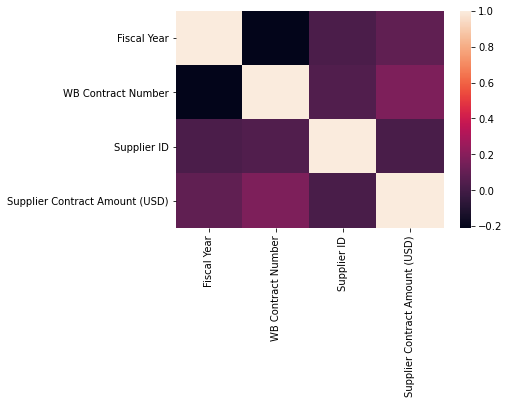

In [26]:
sns.heatmap(d.corr())

In [27]:
a.columns

Index(['As of Date', 'Fiscal Year', 'Region', 'Borrower Country',
       'Borrower Country Code', 'Project ID', 'Project Name',
       'Project Global Practice', 'Procurement Category', 'Procurement Method',
       'WB Contract Number', 'Contract Description',
       'Borrower Contract Reference Number', 'Contract Signing Date',
       'Supplier ID', 'Supplier', 'Supplier Country', 'Supplier Country Code',
       'Supplier Contract Amount (USD)', 'Review type'],
      dtype='object')

# LINEAR REGRESSION

In [68]:
x=c[['WB Contract Number','Fiscal Year']]
y=c['Fiscal Year']

In [69]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [70]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [71]:
print(lr.intercept_)

0.0


In [72]:
r=pd.DataFrame(lr.coef_,x.columns,columns=['Co-efficient'])
r

,Co-efficient
WB Contract Number,-2.523671e-19
Fiscal Year,1.000000e+00


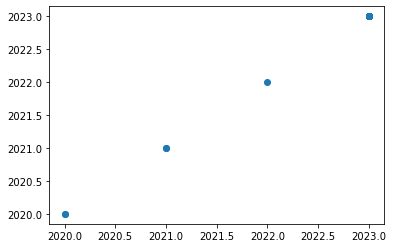

In [73]:
u=lr.predict(x_test)
plt.scatter(y_test,u)

In [74]:
print(lr.score(x_test,y_test))

1.0


In [75]:
lr.score(x_train,y_train)

1.0

# RIDGE REGRESSION

In [76]:
rr=Ridge(alpha=10)
rr.fit(x_train,y_train)

Ridge(alpha=10)

In [77]:
rr.score(x_test,y_test)

0.7347148018662562

# LASSO REGRESSION

In [78]:
la=Lasso(alpha=10)
la.fit(x_train,y_train)

Lasso(alpha=10)

In [79]:
la.score(x_test,y_test)

-0.04268292682930164

# ELASTIC NET

In [80]:
from sklearn.linear_model import ElasticNet 
p=ElasticNet()
p.fit(x_train,y_train)

ElasticNet()

In [81]:
print(p.coef_)

[-0.00132191  0.        ]


In [82]:
print(p.intercept_)

4313.091658822745


In [83]:
print(p.predict(x_test))

[2022.87672697 2022.97322643 2022.89787754 2022.86482978 2022.98380171
 2022.93621294 2022.96265114 2022.87143933 2022.94811013 2022.86218596
 2022.86086405 2022.87276124 2022.90977473 2022.95207586 2022.91109664
 2022.97058261 2022.85293259 2022.92695956 2022.88598034 2022.90845282
 2022.97587025 2022.97719216 2022.89655563 2022.90316518 2022.94282249
 2022.88994608 2022.91770619 2022.96793878 2022.94017867 2022.87540506
 2022.88465843 2022.94678822 2022.96000732 2022.93224721 2022.92035001
 2022.93753485 2022.87937079 2022.97851407 2022.94546631 2022.94150058
 2022.91241855 2022.86350787 2022.92299383 2022.90448709 2022.96661687
 2022.95075395 2022.97454834]


In [84]:
print(p.score(x_test,y_test))

-0.016897951309981396


# EVALUATION METRICS

In [85]:
from sklearn import metrics
print("Mean Absolytre Error:",metrics.mean_absolute_error(y_test,u))

Mean Absolytre Error: 0.0


In [86]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test,u))

Mean Squared Error: 0.0


In [87]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test,u)))

Root Mean Squared Error: 0.0


# MODEL SAVING

In [105]:
import pickle

In [106]:
filename="prediction"                     
pickle.dump(lr,open(filename,'wb'))  

In [107]:
filename="prediction"
model=pickle.load(open(filename,'rb'))

In [111]:
real=[[10,20],[12,43]]
result=model.predict(real)

In [112]:
result

array([20., 43.])

# LOGISTIC REGRESSION

In [117]:

from sklearn.preprocessing import StandardScaler

In [118]:
h=StandardScaler().fit_transform(x)

In [119]:
o=LogisticRegression(max_iter=10000)
o.fit(h,y)

LogisticRegression(max_iter=10000)

In [142]:
t=[[12,23]]

In [143]:
e=o.predict(t)
print(e)

[2023]


In [144]:
o.classes_

array([2020, 2021, 2022, 2023], dtype=int64)

In [145]:
print(o.score(x_test,y_test))

0.0425531914893617


In [146]:
o.predict_proba(t)[0][0]

3.7660947135337564e-36

In [147]:
o.predict_proba(t)[0][1]

1.9605492080834175e-27

# RANDOM FOREST

In [148]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [149]:
parameters={'max_depth':[1,57],
  'min_samples_leaf':[5,34],
           'n_estimators':[2,46]}

In [150]:
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(estimator=rfc,param_grid=parameters,cv=2,scoring="accuracy")
grid_search.fit(x_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=2, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 57], 'min_samples_leaf': [5, 34],
                         'n_estimators': [2, 46]},
             scoring='accuracy')

In [151]:
grid_search.best_score_

0.957427536231884

In [152]:
rfc_best=grid_search.best_estimator_

[Text(2511.0, 1834.6499999999999, 'X[0] <= 1732507.5\ngini = 0.081\nsamples = 30\nvalue = [2, 0, 45]'),
 Text(1255.5, 611.55, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 34]'),
 Text(3766.5, 611.55, 'gini = 0.26\nsamples = 8\nvalue = [2, 0, 11]')]

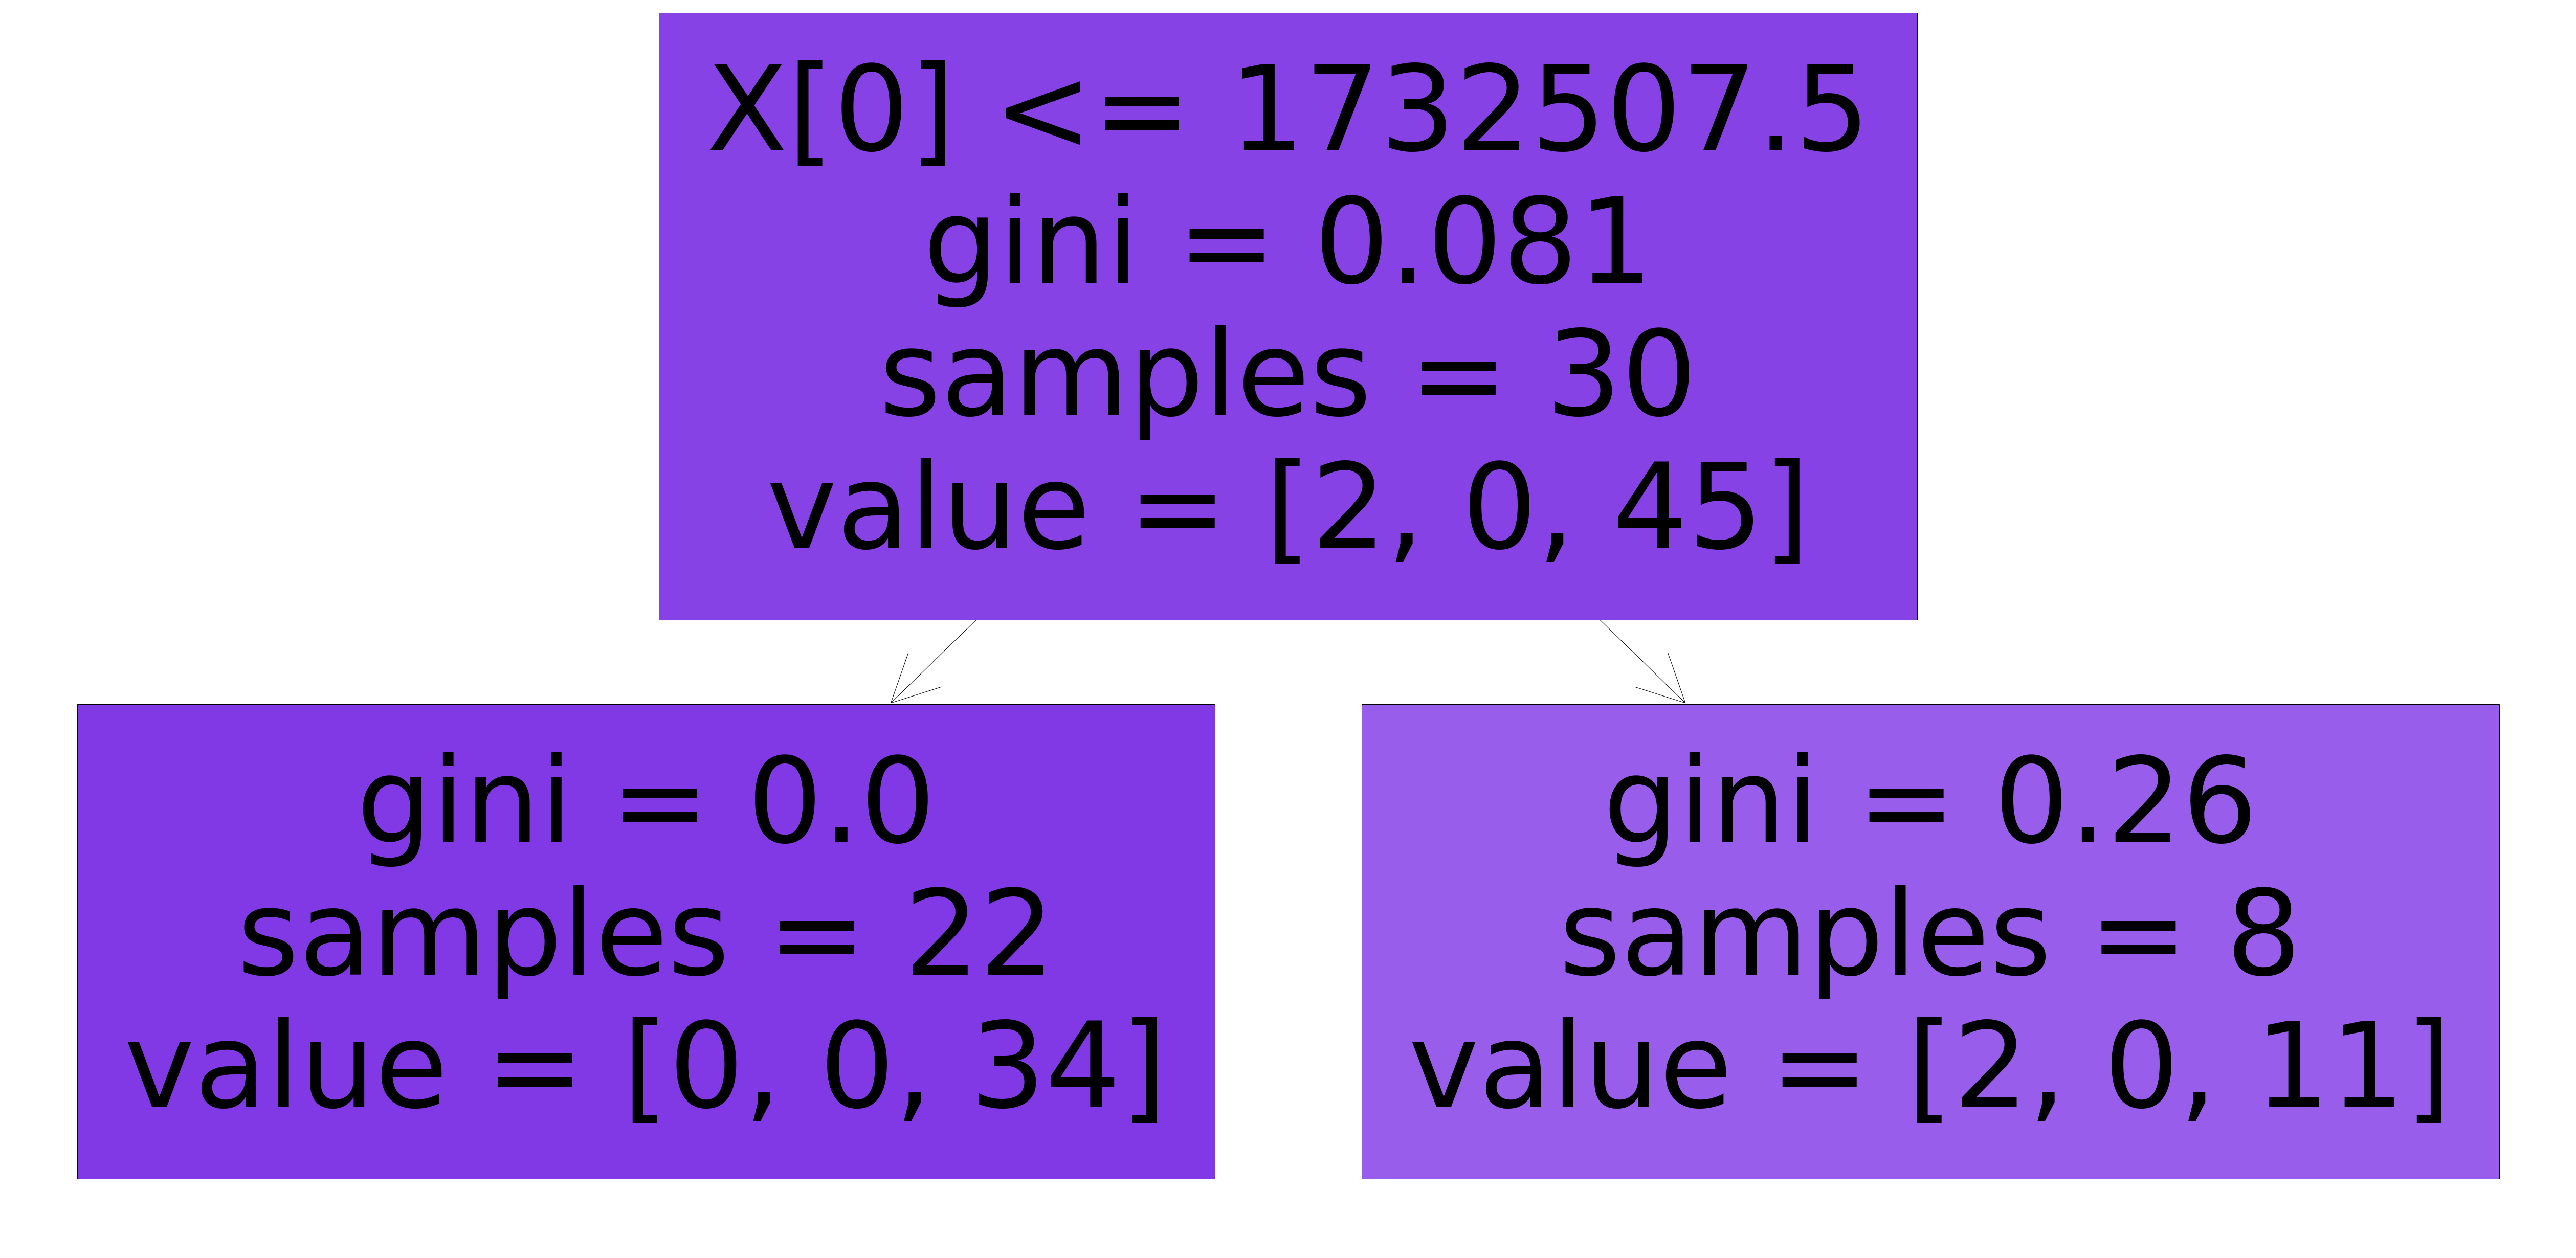

In [161]:
from sklearn.tree import plot_tree
plt.figure(figsize=(90,45))
plot_tree(rfc_best.estimators_[0],filled=True)